# **T√âCNICAS DE MONTECARLO**

M√°ster en Tratamiento Estad√≠stico-Computacional de la Informaci√≥n - 2023/2024

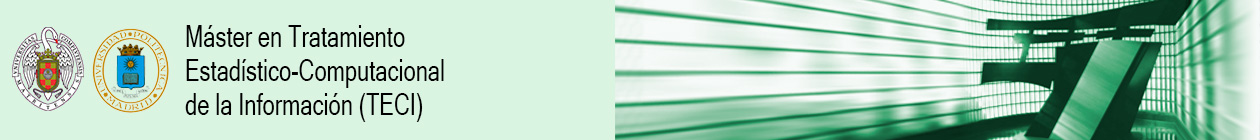

Andr√©s Herencia L√≥pez-Menchero

## **Generaci√≥n de variables aleatorias**

## Introducci√≥n

La simulaci√≥n estad√≠stica o simulaci√≥n de Monte Carlo abarca una colecci√≥n de
t√©cnicas estad√≠sticas que permiten dar soluciones a problemas matem√°ticos o
f√≠sicos por medio de pruebas aleatorias repetidas. Dichas t√©cnicas est√°n as√≠
basadas en el muestreo sistem√°tico de variables aleatorias.
Estas simulaciones juegan un papel determinante en el c√°lculo de series (caso
discreto) y en la aproximaci√≥n de integrales y c√°lculo de √°reas (caso continuo).

Ejemplo: Sup√≥ngase que se quiere calcular $\int_a^b g(x) dx$ con $g$ acotada en $(a,b)$.

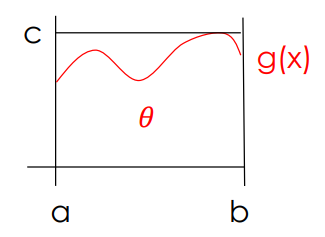

#### M√©todo de acertar y fallar

- Se construye el rect√°ngulo m√°s peque√±o que contenga dicha √°rea.
- Se simulan $n$ pares $(x,y)$ uniformes dentro de dicho rect√°ngulo.
- Se calcula cu√°ntos de ellos caen por debajo de la curva, $R$.
$$R \sim B\left(n, p=\frac{\theta}{c\times(b-a)}\right)$$
donde $B$ es una distribuci√≥n Binomial y $p$ es la proporci√≥n de aciertos.
- La proporci√≥n obtenida es multiplicada por el √°ra del rect√°ngulo, $c\times (b-a)$.

El estimador Montecarlo de acertar o fallar es $\tilde{\theta} = c(b-a)\frac{R}{n}$.

**Ejercicio**: Calcular el √°rea de un c√≠rculo centrado en el origen y de radio 1.


In [ ]:
# el √°rea de un circulo es x^2 + y^2 = r^2. Si r = 1, entonces x^2 + y^2 = 1.
import random
import numpy as np

def circle_area_monte_carlo(n=1e6):
    """
    Estimate the area of a unit circle using the Monte Carlo method.

    Parameters:
    - n (int): The number of random points to generate for the estimation.
    Default is 1e6.

    Returns:
    float: Estimated area of the unit circle.

    Note: Increasing the value of 'n' generally improves the accuracy of the
    estimation.
    """
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1, 1)
        y = random.uniform(-1, 1)
        # Verify if the point (x,y) is inside the circle.
        if x**2 + y**2 <= 1:
            inside_circle += 1

    est_circle_area = inside_circle / n
    est_square_area = 4
    est_area = est_square_area * est_circle_area

    return est_area

num_puntos = [1e0,1e1,1e2,1e3,1e4,1e5,1e6]
for n in num_puntos:
    est_area = circle_area_monte_carlo(int(n))
    print(f"√Årea estimada del c√≠rculo: {est_area} con {int(n)} puntos")

√Årea estimada del c√≠rculo: 4.0 con 1 puntos
√Årea estimada del c√≠rculo: 2.8 con 10 puntos
√Årea estimada del c√≠rculo: 3.16 con 100 puntos
√Årea estimada del c√≠rculo: 3.188 con 1000 puntos
√Årea estimada del c√≠rculo: 3.1184 con 10000 puntos
√Årea estimada del c√≠rculo: 3.14108 con 100000 puntos
√Årea estimada del c√≠rculo: 3.141704 con 1000000 puntos


Haciendolo con una binomial

In [ ]:
def circle_area_montecarlo(n=1e6):
    """
    Estimate the area of a unit circle using the Monte Carlo method and a
    binomial experiment.

    Parameters:
    - n (int): The number of random points to generate for the estimation.
    Default is 1e6.

    Returns:
    float: Estimated area of the unit circle.

    Note: Increasing the value of 'n' generally improves the accuracy of the
    estimation.
    """
    inside_circle = 0
    for _ in range(n):
        x = random.uniform(-1,1)
        y = random.uniform(-1,1)
        if x**2 + y**2 <= 1:
            inside_circle += 1

    p = inside_circle/n
    R = np.random.binomial(n, p)
    estimated_area = R*4
    montecarlo_est = estimated_area/n

    return montecarlo_est

circle_area_montecarlo(1000000)

3.140148

### **Generaci√≥n de variables aleatorias (vv.aa.) discretas**

#### **M√©todo de la transformada inversa**

El algoritmo de Simulaci√≥n Monte Carlo Crudo o Puro est√° fundamentado en la generaci√≥n de n√∫meros aleatorios por el M√©todo de la Transformada Inversa, que consiste en simular valores a partir de n√∫meros aleatorios $\text{U}(0,1)$.

En el caso discreto, siendo $X$ una variable aleatoria discreta con funci√≥n de masa $P(X=x_i) = p_i, \forall i = 1,\dots,k \sum_{i=1}^k p_i =1$ y $F.D.$ acumulada $F_i = P(X\le x_i) =\sum_{j=1}√Æ p_j$:

1. Generar $u\in U(0,1)$.
2. Si $U \le p_1$ entonces $x = x_1$. PARAR.
3. Desde $i=2$ hasta $k$, si $U\le \sum_{j=1}^i p_j$ entonces $x = x_i$. PARAR.

Obs√©rvese que, una vez hecha la asignaci√≥n el
algoritmo se detiene. Por ello, para mejorar la
eficiencia computacional del algoritmo (para no
‚Äúrecorrer‚Äù todos los if's), lo mejor es ordenar las
clases $x_i$ primando aquellas que mayor probabilidad
tengan.

**Ejemplo**: Se desa generar una v.a. discreta X con funci√≥n de masa

| x | P(x) |
|----------|----------|
| 0    | 0.1  |
| 1    | 0.2  |
| 2    | 0.5  |
| 3    | 0.2  |

**Implementaci√≥n**:

In [ ]:
# first step: sort the probabilities

p = {0: 0.1, 1:0.2, 2:0.5, 3:0.2}
p_sorted = dict(sorted(p.items(), key=lambda item: item[1], reverse=True))
x = list(p_sorted.keys())
p = list(np.cumsum(list(p_sorted.values())))
FD = [x,p]
FD

# second step: generate a value from a uniform distribution and make the assignment

u = np.random.uniform(0,1)
x = []
FD[1]

for p in range(len(FD[1])):
  if u <= FD[1][p]:
    x.append(FD[0][p])
x

[3, 0]

In [ ]:
def generate_rv(n, X, p):
    """
    Generate random variables based on a discrete probability distribution.
    If X is binary and p has only two possible values, it is a Bernouilli
    distribution.

    Parameters:
    - n (int): Number of random variables to generate.
    - X (list): List of unique values of the random variable.
    - p (list): List of probabilities associated with each value in X.

    Returns:
    list: A list of n random variables sampled from the given distribution.
    """

    FD = list((zip(*sorted(zip(X, p), key=lambda x: x[1], reverse=True))))
    FD[1] = np.cumsum(FD[1])

    x = []

    u_values = np.random.uniform(0, 1, n)
    x = [FD[0][np.searchsorted(FD[1], u)] for u in u_values]
    return x

generate_rv(10, [0, 1, 2, 3], [0.1, 0.2, 0.5, 0.2])

[2, 3, 3, 3, 2, 1, 0, 0, 2, 3]

##### **Simulaci√≥n de la variable de Bernoulli $B(p)$**

La v.a. de Bernouilli se define como:

$$P_X(x) =
  \begin{cases}
    P(X=1) = p\\
    P(X=0) = q = 1-p
  \end{cases}$$

Esto es

In [ ]:
generate_rv(10,[0,1],[0.5,0.5]) # lo mismo que una Bernouilli

[0, 0, 0, 1, 0, 1, 1, 0, 0, 1]

Otra forma

In [ ]:
import numpy as np

def bernoulli(n=10,p=0.5):
    """
    Generates a Bernoulli distribution of the following parameters:
    Parameters:
    - n (list): number of samples to generate. Default is 10.
    - p (float): probability of success. Default is 0.5.
    Returns:
    - b (list): with the result of the experiment
    """
    b = []
    for i in range(n):
        u = np.random.uniform(0,1)
        b.append(1) if u <= p else b.append(0)
    return b

bernoulli(10,0.5)

[1, 0, 1, 1, 1, 1, 1, 0, 0, 1]

**EJERCICIO:**

1. Generar una muestra constituida por 1000 ‚Äú1‚Äùs y 99000 ‚Äú0‚Äùs.
2. Generar a partir de ella otra muestra que, conservando los ‚Äú1‚Äù, tenga una proporci√≥n parecida de 1‚Äôs y 0‚Äôs.
3. Generar otra que tenga el doble de 0‚Äôs que de 1‚Äôs.

In [ ]:
#1
n = 1000 + 99000
p = [1000/n, 99000/n]
sample = generate_rv(n,[0,1],p)
sample[0:20]

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
sum(sample)

98979

In [ ]:
len(sample)

100000

In [ ]:
#2
def subsample_zeros(sample, p=0.5):
    """
    Subsample zeros to maintain a given probability (p) of ones.

    Parameters:
    - sample (list): List of existing samples (containing ones and zeros).
    - p (float): Probability of retaining a zero during subsampling
    (default is 0.5).

    Returns:
    list: Subsampled list with maintained probability of ones.
    """
    zeros_to_subsample = int((len(sample) - sum(sample))*(1+(1-p)))
    subsampling = []

    for _ in range(zeros_to_subsample):
        u = np.random.uniform(0, 1)
        subsampling.append(1 if u <= p else 0)

    return subsampling

In [ ]:
subsample = subsample_zeros(sample)
subsample[0:20]

[1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1]

In [ ]:
sum(subsample) # n√∫mero de unos

789

In [ ]:
len(subsample) # tama√±o total muestreado

1531

In [ ]:
# 3
subsample2 = subsample_zeros(sample, p = 0.33)
subsample2[0:20]

[0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1]

In [ ]:
sum(subsample2) # n√∫mero de unos

555

In [ ]:
len(subsample2) # tama√±o total muestreado

1705

##### **Simulaci√≥n de la variable Binomial $BI(n,p)$**

N√∫mero de √©xitos en $n$ ensayos de Bernoulli con probabilidad de √©xito $p$.
= N√∫mero de √©xitos en $n$ intentos con reemplazamiento.

**Funci√≥n de masa:**

$$ P(X=k) = \binom{n}{k} p^k (1-p)^{n-k} $$

La idea es generar $n$ distribuciones de Bernoulli y sumar.

1. Inicializaci√≥n: $x = 0$
2. Para $i=1$ hasta $n$:
 - Generar $u\in U(0,1)$
 - Si $u \le p$ entonces $x=x+1$.

In [ ]:
import matplotlib.pyplot as plt

def binomial(n=10, p=0.5, trials=10):
    """
    Generates a Binomial distribution using the Bernoulli distribution.

    Parameters:
    - n (int): Number of samples to generate. Default is 10.
    - p (float): Probability of success for each Bernoulli trial. Default is 0.5.
    - trials (int): Number of Bernoulli trials per sample. Default is 1.

    Returns:
    - binomial_dist (list): List with the result of the Binomial distribution.
    """
    binomial_dist = []

    for _ in range(n):
        # Summing up the results of 'trials' number of Bernoulli trials
        result = sum(bernoulli(trials, p))
        binomial_dist.append(result)

    # Plot histogram
    plt.hist(binomial_dist, bins='auto')
    plt.title('Binomial Random Distribution')
    plt.show()

    return binomial_dist

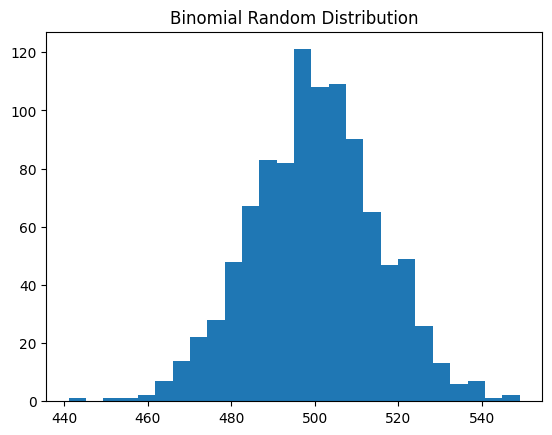

[526,
 506,
 483,
 494,
 478,
 489,
 500,
 496,
 501,
 520,
 519,
 511,
 508,
 496,
 511,
 474,
 511,
 492,
 506,
 510]

In [ ]:
BI = binomial(1000, 0.5, 1000) # with one trial is the same as a Bernoulli dist.
BI[0:20]

Con un (n=1) ensayo, es lo mismo que una Bernoulli

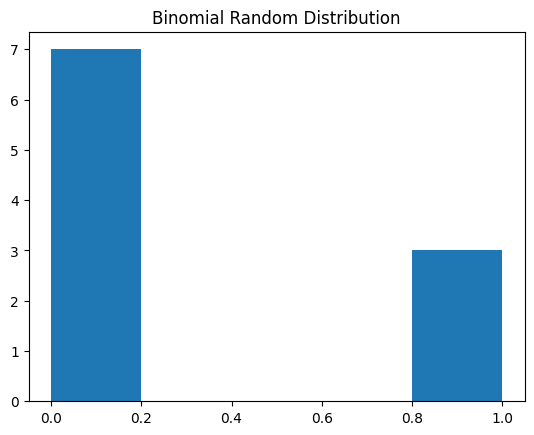

[1, 0, 0, 1, 0, 0, 1, 0, 0, 0]

In [ ]:
binomial(10, 0.5, 1)

##### **Simulaci√≥n de la variable de Poisson $P(\lambda)$**

**Funci√≥n de probabilidad de masa**:

$$P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!} $$

No existe una f√≥rmula expl√≠cita para la funci√≥n de distribuci√≥n y por ello F se genera acumulando las probabilidades anteriores que son generadas recursivamente:

$$p_{i+1} = \frac{\lambda}{i+1}\cdot ùëù_i$$

Es decir

$$ p_0 = e^{-\lambda}, \quad p_1 = \lambda \cdot p_0 = e^{-\lambda}\cdot \lambda, \quad p_2 = \frac{\lambda}{2}\cdot p_1 = \frac{e^{-\lambda} \cdot \lambda^2}{2}, \dots $$

Pasos:

1. Inicializaci√≥n $i=0; \quad p = e^-\lambda; \quad F=p$
2. Si $u<F$ entonces $x=i$. PARAR.
3. Definimos $p=\frac{\lambda}{i+1} \cdot p; \quad F= F+p; \quad i = i+1$. Ir al paso 2.

**Implementaci√≥n:**

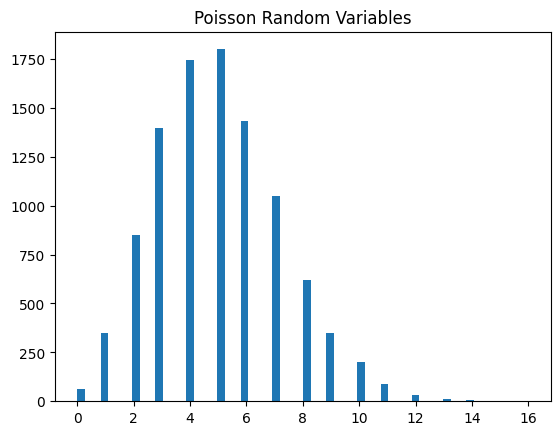

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def poisson(n=100, L=12):
    """
    Generate Poisson random variables and plot their histogram.

    Parameters:
    - n (int, optional): Number of random variables to generate. Defaults to 100.
    - L (float, optional): Lambda parameter for the Poisson distribution.
    Default is 12.

    Returns:
    - x (list): sample of a poisson distribution of n size.
    """

    _lambda = 12
    u = np.random.rand(n)

    # Using a for loop
    x = []
    for j in range(len(u)):
        i = 0
        p = np.exp(-L)
        F = p
        while u[j] > F:
            p = (L * p) / (i + 1)
            F = F + p
            i = i + 1
        x.append(i)

    # Plot histogram
    plt.hist(x, bins='auto')
    plt.title('Poisson Random Variables')
    plt.show()

    return x

x = poisson(n=10000,L=5)

##### **Simulaci√≥n de una variable aleatoria Geom√©trica $G(p)$.**

N√∫mero de fracasos encontrados hasta lograr el primer √©xito en un muestreo aleatorio con reemplazamiento, sabiendo que la probabilidad de √©xito es $p$ y la probabilidad de fracaso es $1-p$

**Funci√≥n de masa:**

$$P(X= k) = (1-p)^kp$$

**Notas:**

- Este m√©todo es bueno si $p$ es grande pues se supone que el n√∫mero de iteraciones para generar un valor de $X$ es bajo ya que es probable que el valor de la $U(0,1)$ sea menor que $p$.

- Si $p$ es peque√±o, puede ser necesario generar muchos valores $U(0,1)$ lo que jugar√≠a en contra de la eficiencia computacional del algoritmo.

**Implementaci√≥n:**


In [ ]:
import numpy as np

def geometric(p=0.1, n=1000):
    """
    Generate a discrete geometric random variable.

    Parameters:
    - p (float, optional): Probability of success. Default is 0.1.
    - n (int, optional): Number of iterations. Default is 1000.

    Returns:
    - x (list): A list of generated random variables.
    """
    x = []

    for j in range(1, n + 1):
        y = 0
        while True:
            u = np.random.rand(1)
            if u <= p:
                x.append(y)
                break
            else:
                y = y + 1

    plt.hist(x, bins='auto')
    plt.title('Geometric Random Variables distribution')
    plt.show()

    return x

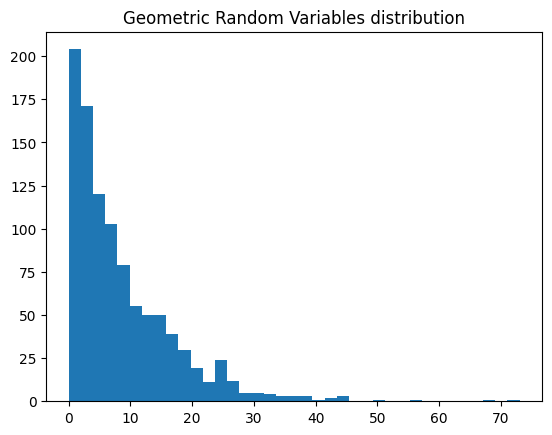

[25, 3, 2, 14, 8, 5, 24, 16, 19, 2, 2, 0, 1, 4, 3, 5, 3, 2, 5, 3]

In [ ]:
x = geometric()
x[0:20]

##### **Simulaci√≥n de una variable aleatoria Hipergeom√©trica $H(N,D,p)$.**

Es como la Binomial, pero sin hacer reemplazamiento en el muestreo
Probabilidad de obtener $k$ unidades defectuosas ("√©xitos") al extraer
$n$ unidades sin reemplazamiento de una poblaci√≥n de tama√±o $N$,
entre las que hay $D$ unidades defectuosas ("√©xitos") y "$N-D$ unidades
no defectuosas ("fracasos").

**Funci√≥n de masa:**

$$P(X=k) = \frac{\binom{D}{k}\binom{N-D}{n-k}}{\binom{N}{n}}$$

**Implementaci√≥n:**

In [ ]:
import matplotlib.pyplot as plt
import random

def hypergeometric(N=500, D=50, n=50, size=1000):
    """
    Simulate a hypergeometric distribution and plot its histogram.

    Parameters:
    - N (int, optional): Population size. Defaults to 500.
    - D (int, optional): Number of success states in the population. Defaults to 50.
    - n (int, optional): Number of draws. Defaults to 50.
    - size (int, optional): Number of simulations. Defaults to 1000.

    Returns:
    - random_values (list): A list of random variables generated from the
    hypergeometric distribution.
    """
    random_values = []
    for _ in range(size):
        x = 0
        N_prime = N
        d = D
        c = N - D

        for _ in range(n):
            u = random.uniform(0, 1)  # Generar un n√∫mero aleatorio en el intervalo [0, 1)

            if u <= d / N_prime:
                x += 1
                N_prime -= 1
                d -= 1
            else:
                N_prime -= 1
                c -= 1
        random_values.append(x)
    # Crear un histograma para visualizar los datos
    plt.hist(random_values, bins=range(min(random_values), max(random_values) + 1, 1), alpha=0.7, rwidth=0.85)
    plt.title(f'Distribuci√≥n Hipergeom√©trica (N={N}, D={D}, n={n})')
    plt.xlabel('N√∫mero de √âxitos')
    plt.ylabel('Frecuencia')
    plt.grid(True)
    plt.show()

    return random_values

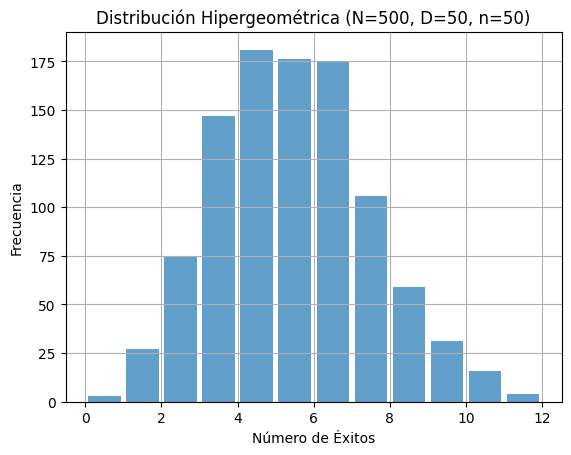

[1, 6, 2, 4, 9, 7, 6, 5, 5, 4, 6, 3, 3, 7, 4, 6, 9, 3, 3, 3]

In [ ]:
x = hypergeometric()
x[0:20]

##### **Simulaci√≥n de la variable aleatoria Binomial Negativa $BN(m,p)$.**

Distribuci√≥n que se obtiene al observar el n√∫mero de fracasos encontrados antes de conseguir el
"m"-√©simo √©xito en un muestreo aleatorio con reemplazamiento, siendo la probabilidad de √©xito $p$.

**Funci√≥n de masa:**

$$P(X=k) = \binom{m+k-1}{k}p^m(1-p)^k$$

**Implementaci√≥n:**

In [ ]:
import random
import matplotlib.pyplot as plt

def negative_binomial(m = 10, p = 0.5, size = 10000):
    """
    Simulate a negative binomial distribution and plot its histogram.

    Parameters:
    - m (int, optional): Number of successes. Defaults to 10.
    - p (float, optional): Probability of success on each trial. Defaults to 0.5.
    - size (int, optional): Number of simulations. Defaults to 10000.

    Returns:
    - random_values (list): A list of random variables generated from the
    negative binomial distribution.
    """

    random_values = []
    for _ in range(size):
        trials = 0  # Count of Bernoulli trials
        successes = 0  # Count of successes

        while successes < m:
            trial_result = random.random()  # Generate a random number between 0 and 1
            if trial_result < p:
                successes += 1
            trials += 1

        random_values.append(trials)

    plt.hist(random_values, bins=range(min(random_values), max(random_values) + 1, 1), alpha=0.7, rwidth=0.85)
    plt.title(f'Negative Binomial Distribution (m={m}, p={p})')
    plt.xlabel('Number of Trials')
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

    return random_values

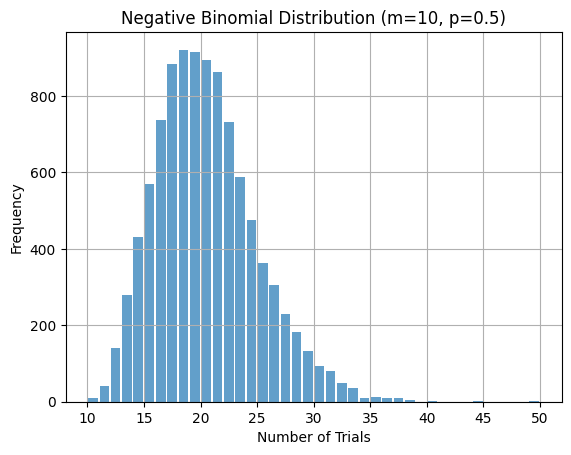

[14, 26, 17, 21, 23, 20, 15, 26, 23, 27]

In [ ]:
random_values = negative_binomial()
random_values[0:10]

### **Generaci√≥n de variables aleatorias absolutamente continuas.**

Sea $X$ una v.a absolutamente continua con funci√≥n de distribuci√≥n acumulada $F_X(x)$.

El m√©todo m√°s popular de generaci√≥n de valores de estas distribuciones vuelve a ser el *M√©todo de la Transformada Inversa*.


#### **M√©todo de la transformada inversa.**

##### **Simulaci√≥n de variable aleatoria del tipo uniforme $U(a,b)$.**

**Funci√≥n de densidad:**

$$f_X(x) = \frac{1}{b-a}1_{(a,b)}$$

Donde la funci√≥n $1_{(a,b)}$ es:

$$ 1_{(a,b)} =
\begin{cases}
1 \quad \text{si } x\in(a,b) & \\
0 \quad \text{si } x \notin (a,b) \\
\end{cases} $$

**Funci√≥n de distribuci√≥n:** (todas las funciones de distribuci√≥n se sacan integrando la funci√≥n de densidad para el intervalo donde est√©n definidas).

$F_x(x) = \frac{x-a}{b-a}$ si $a\le x\lt b$, $\quad F_X(x)=0$ en el resto.

**Algoritmo:**
1. Generar $u\sim U(0,1)$
2. Sea $X = a + U(b-a)$.

**Ejercicio**: Generar valores de una $U(10,25)$ mediante el m√©todo de la TI.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def uniform_cont(a = 10, b = 25, n = 100):
    """
    Simulate a continuous uniform distribution based on "a" and "b" parameters.

    Parameters:
    - a (int): minimum value of the uniform distribution.
    - b (int): maximum value of the uniform distribution.
    - n (int): trials of the experiment, size of the generated sample.

    Returns:
    - x (list): a list which contains the generated random variables.
    """
    x = []
    for i in range(n):
        u = np.random.uniform(0,1)
        x.append(a + u*(b-a))

    plt.plot(x, alpha=0.7)
    plt.title(fr'Uniform distribution $U({a},{b})$')
    plt.ylim(a*0.8, b*1.2)
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid(True)
    plt.show()
    return x

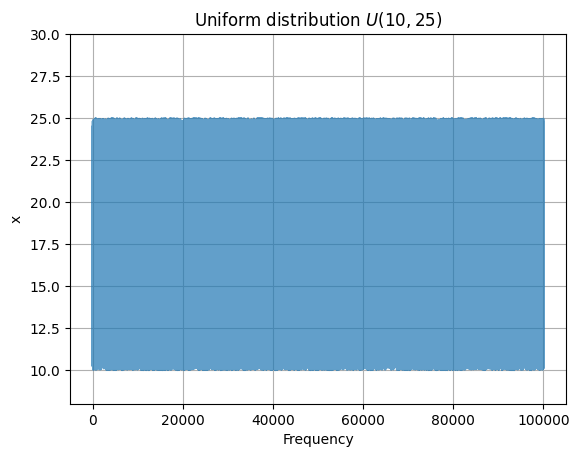

[17.39758845028533,
 22.672393981172885,
 20.643981112298118,
 22.997749179762764,
 18.70124294786815,
 22.814211228316235,
 11.040516863066903,
 11.783779726459334,
 17.069046233327455,
 17.294117242709696]

In [ ]:
x = uniform_cont(n=100000)
x[0:10]

##### **Simulaci√≥n de variable aleatoria del tipo Exponencial $EXP(\lambda)$.**

**Funci√≥n de densidad:**

$$f_X(x) = \lambda\cdot e^{-\lambda x} \times 1_{(0,\infty)}$$

**Funci√≥n de distribuci√≥n:**

$$F_X(x) =
\begin{cases}
0, & \quad \text{si } x\le 0 & \\
1 - e^{-\lambda x}, & \quad \text{si } x \ge 0
\end{cases} $$

$$ u = 1 - e^{-\lambda x} \Rightarrow e^{-\lambda x}= 1 - u \Rightarrow -\lambda x = log(1 - u ) \Rightarrow x = -\frac{1}{\lambda} log ( 1 - u ) \\
\Rightarrow x = -\frac{\log{(u)}}{\lambda} $$.


**Implementaci√≥n:**

1. Generar $u\sim U(0,1)$.
2. Definir $X = \frac{-log{(U)}}{\lambda}$.

In [ ]:
def exponential(L = 1, n = 100):
    """
    Description:
    The exponential function generates a sample from the exponential
    distribution with rate parameter L.

    Parameters:
    - L (optional, default=1): The rate parameter of the exponential
    distribution. It represents the average rate of events occurring per
    unit of time.
    - n (optional, default=100): The number of samples to generate from the
    exponential distribution.

    Returns:
    - x: A list containing n samples from the exponential distribution.
    """
    x = [];
    for i in range(n):
        u = np.random.uniform(0,1)
        x.append(-np.log(u)/L)

    plt.plot(x, alpha=0.7, label = 'exponential rv')
    plt.title(fr'Exponential distribution $EXP({L})$')
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid(True)
    plt.show()
    return x

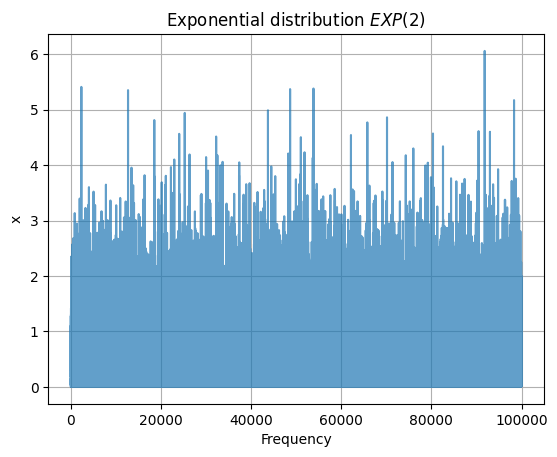

[0.19026986114895028,
 0.971392260334275,
 0.21523120052346809,
 0.14907142095248613,
 0.3592599906903745,
 0.16354772017807265,
 0.3616187409588443,
 0.035390332079765795,
 0.6307590092487715,
 0.39112819166891455]

In [ ]:
x = exponential(2,100000)
x[0:10]

##### **Simulaci√≥n de variable aleatoria del tipo Weibull $W(\alpha, \beta)$.**

**Funci√≥n de densidad:**

$$f_X(x) = \alpha\cdot \beta ^{\alpha} x^{\alpha - 1} \cdot e^{{-\beta x}^{\alpha}} $$

**Funci√≥n de distribuci√≥n:**

$$
F_X(x) =
\begin{cases}
0 & \quad \text{ si } x\lt 0 & \\
1 - e ^ {-{(\beta x)}^{\alpha}} & \quad \text{ si }x \ge 0
\end{cases}
$$

**Implementaci√≥n:**

1. Generar $u\sim U(0,1)$.
2. Definir $X = \frac{{(-\log{u})}^{1/\alpha}}{\beta}$.

In [ ]:
def weibull(alpha = 1, beta = 1, n = 100):
    """
    Description:
    The weibull function generates a sample from the Weibull distribution with
    shape parameter alpha and scale parameter beta.

    Parameters:
    - alpha (optional, default=1): The shape parameter of the Weibull
    distribution. It determines the shape of the distribution curve.
    - beta (optional, default=1): The scale parameter of the Weibull
    distribution. It influences the spread or width of the distribution.
    - n (optional, default=100): The number of samples to generate from
    the Weibull distribution.

    Returns:
    - x: A list containing n samples from the Weibull distribution.
    """
    x = [];
    for i in range(n):
        u = np.random.uniform(0,1)
        x.append((-(np.log(u))**(1/alpha))/beta)

    plt.plot(x, alpha=0.7, label = 'exponential rv')
    plt.title(fr'Weibull distribution $W({alpha},{beta})$')
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid(True)
    plt.show()
    return x

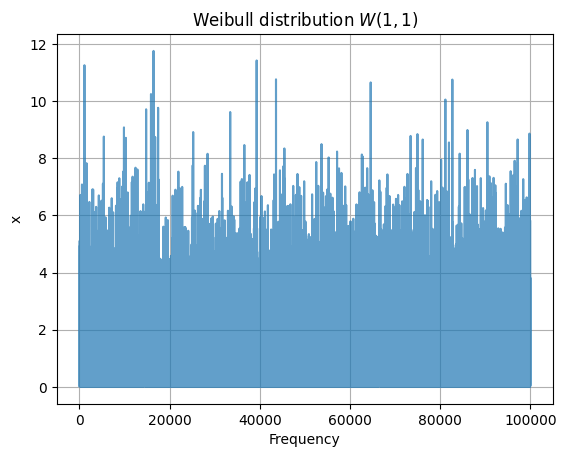

[0.06310357501144433,
 2.8536038146328195,
 0.11153088627652835,
 0.5871362289146537,
 1.3070337972026473,
 2.1439756643069474,
 0.04795345841588714,
 1.654143860052722,
 1.16791843715734,
 0.7570063377606405]

In [ ]:
x = weibull(n= 100000)
x[0:10]

##### **Simulaci√≥n de variable aleatoria del tipo Gamma $\gamma(p,\lambda)$.**

Para la distribuci√≥n $\gamma$ no existe una f√≥rmula expl√≠cita para la $F.D.$, y por ello no es posible aplicar directamente el m√©todo de inversi√≥n. A tal fin, existen otros m√©todos de simulaci√≥n como el m√©todo de rechazo (lo veremos m√°s adelante).

###### Distribuci√≥n del tipo Erlang $E(p, \lambda)$.

Caso particular cuando $p \in \mathbb{N}$.

Se puede observar que, si $X_1,X_2, \dots , X_p \sim Exp(\lambda)$ son v.a.i.i.d (Variables aleatorias independientes e id√©nticamente distribuidas) con $X_i \sim Exp (\lambda)$, entonces $\sum_{i=1}^{p} X_i \sim \gamma(p,\lambda)$.

----

Fue propuesta para examinar el n√∫mero de llamadas telef√≥nicas
que podr√≠an hacerse al mismo tiempo a los operadores de
estaciones de conmutaci√≥n.

De igual manera que la distribuci√≥n exponencial, es una distribuci√≥n habitual para simular
tiempos de espera (hasta la pr√≥xima llegada/llamada, hasta ser atendido, etc.) en los sistemas de
colas en general.

La distribuci√≥n Erlang tambi√©n se puede ver como la distribuci√≥n del tiempo transcurrido hasta que se producen $p$ sucesos de un proceso de Poisson de par√°metro $\lambda$. Dichos procesos, tambi√©n est√°n vinculados a la Teor√≠a de Colas, utiliz√°ndose para saber el n√∫mero de sucesos que ocurren en una cola (por ejemplo: llegadas de clientes) en un intervalo de tiempo $[0,t)$.

----

**Implementaci√≥n:**

1. Generar $u_1, u_2, \dots, u_p \sim U(0,1)$ (independientes).
2. Definir $X = \frac{-log{u_1}}{\lambda} - \frac{-\log{u_2}}{\lambda} - \dots \frac{-\log{u_p}}{\lambda} = - \frac{\sum_{i=1}^{p} \log{u_i}}{\lambda} = - \frac{\log{(\sum_{i=1}^{p}{u_i})}}{\lambda}$

In [ ]:
def erlang(p = 100, L = 1, n = 100):
    """
    Description:
    The erlang function generates a sample from the Erlang distribution, also
    known as the gamma distribution with an integer shape parameter p.

    Parameters:
    - p (optional, default=100): The shape parameter of the Erlang distribution.
     It represents the number of events for which the waiting time is modeled.
    - L (optional, default=1): The rate parameter of the Poisson process.
    It indicates the average rate of events per unit of time.
    - n (optional, default=100): The number of samples to generate from the
    Erlang distribution.

    Returns:
    - X: A list containing n samples from the Erlang distribution.
    """
    X =[]
    for i in range(n):
        x = 0
        for i in range(p):
            u = np.random.uniform(0,1)
            x -= np.log(u)/L
        X.append(x)

    plt.plot(X)
    plt.title(fr'Erlang distribution $\gamma({p},{L})$')
    plt.xlabel('Frequency')
    plt.ylabel(r'x')
    plt.grid()
    plt.show()

    return X

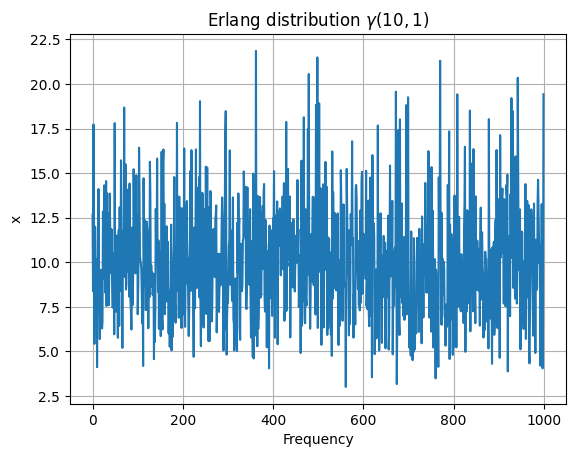

[12.68138003110193,
 8.366331698168752,
 17.72465136447859,
 11.74056129810727,
 5.422206626834183,
 12.009738559002383,
 11.971339007183504,
 9.874433994487473,
 7.400940211392795,
 10.150157116649998]

In [ ]:
x = erlang(p = 10, L = 1, n = 1000)
x[0:10]

#### **M√©todo de Rechazo.**

Cuando no se conoce la $F.D$, el m√©todo de la Transformada Inversa no se puede aplicar. En dichos casos, es preciso recurrir a m√©todos alternativos.

La filosof√≠a del m√©todo de Rechazo consiste en tomar la funci√≥n de densidad $f_X$ asociada a la distribuci√≥n y encajarla en un rect√°ngulo.

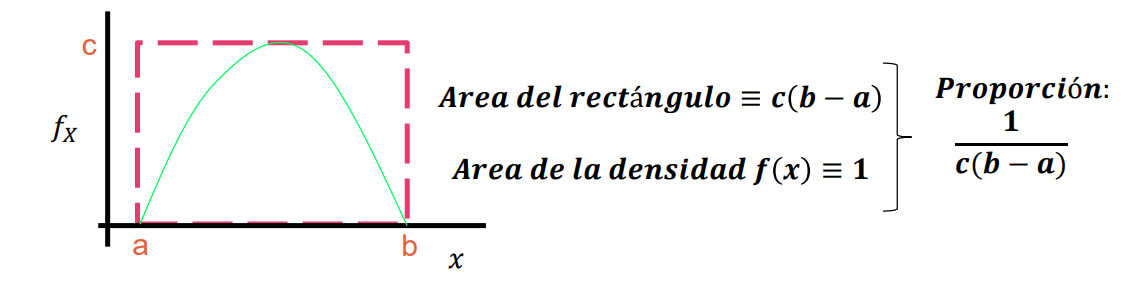

**Ejemplo:**

"Se lanza un dardo" x a la caja $\begin{cases} \text{Se genera un valor } & U(a,b) & \\
\text{Se genera un valor } & U(0,c)
\end{cases} \Rightarrow$

- Si cae "dentro" (por debajo de la curva), se acepta x como un valor que se distribuye seg√∫n $f_X$.
- Si cae fuera (por encima), se rechaza.

Algoritmo
1. Let ùë¢1, ùë¢2 ‚àº ùëà 0,1
Let ùë• = ùëé + ùëè ‚àí ùëé √ó ùë¢1 ‚àà ùëé, ùëè and ùë¶ = ùëê √ó ùë¢2 ‚àà 0, ùëê
2. Let ùëìùëã ùë• . If ùë¶ > ùëìùëã ùë• , the go to Step 1.
3. Let ùë•ùëúùë¢ùë° = ùë•

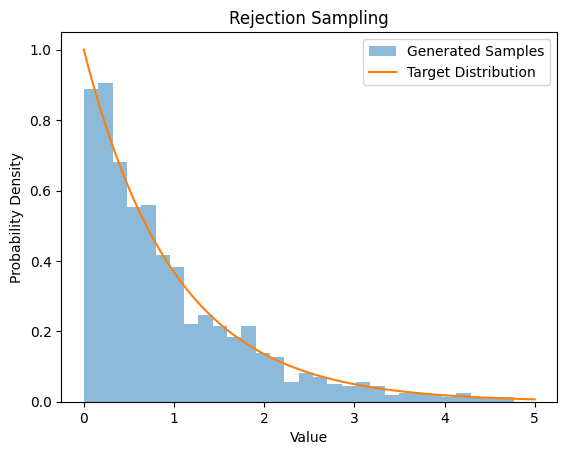

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rejection_sampling(target_distribution, proposal_distribution = 1,
                       a = 0, b = 5, c = 1, n = 1000):
    """
    Rejection sampling algorithm.

    Parameters:
    - target_distribution: Function representing the target probability density
    function.
    - proposal_distribution: Function representing the proposal probability
    density function.
    - a: Lower bound of the range for x.
    - b: Upper bound of the range for x.
    - c: Upper bound of the range for y (considered as the maximum value of the
    target distribution).
    - n: Number of samples to generate.

    Returns:
    - samples: List of n samples generated using rejection sampling.
    """

    samples = []

    while len(samples) < n:
        u1 = np.random.uniform(0, 1)
        u2 = np.random.uniform(0, 1)

        x = a + (b - a) * u1
        y = c * u2

        if y <= target_distribution(x):
            samples.append(x)

    return samples

def target_distribution(x):
    return np.exp(-x)
def proposal_distribution(x):
    return 1

a = 0; b = 5; c = 1; n = 1000
samples = rejection_sampling(target_distribution, proposal_distribution, a, b, c, n)

plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
x_values = np.linspace(a, b, 100)
plt.plot(x_values, target_distribution(x_values), label='Target Distribution')
plt.title('Rejection Sampling')
plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.legend()
plt.show()

##### **Simulaci√≥n de variable aleatoria del tipo Beta $B(\alpha,\beta)$.**

Para la distribuci√≥n Œíeta no existe una f√≥rmula expl√≠cita para la F.D ‚áí m√©todo de rechazo.

**Funci√≥n de distribuci√≥n:**

$$f_X(x) = \frac{x^{\alpha-1}(a-x)^{\beta-1}}{B(\alpha,\beta}$$ con $$B(\alpha,\beta) = \frac{\Gamma(\alpha)\times \Gamma(\beta)}{\Gamma(\alpha + \beta)}$$

**Implementaci√≥n:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def target_beta_distribution(x, alpha=2, beta=2):
    """
    Mathematical expression of the fdp for the beta distribution.
    """
    return (x**(alpha-1) * (1-x)**(beta-1)) / ((2**(alpha+beta-1)) \
    / (np.math.factorial(alpha-1) * np.math.factorial(beta-1)))

def beta(n=100, alpha=2, beta=2):
    """
    Generate samples from the beta distribution using the rejection sampling method.

    Parameters:
    - n: Number of samples to generate (default=100).
    - alpha: Shape parameter (default=2).
    - beta: Shape parameter (default=2).

    Returns:
    - samples: List of n samples generated using rejection sampling.
    """
    samples = []

    # Constant for the envelope function
    c = target_beta_distribution(1, alpha, beta)

    while len(samples) < n:
        u1, u2 = np.random.uniform(0, 1, 2)

        x = u1
        y = c * u2

        if y <= target_beta_distribution(x, alpha, beta):
            samples.append(x)

    plt.hist(samples, bins=30, density=False, alpha=0.5, label='Generated Samples')
    x_values = np.linspace(0, 1, 100)
    plt.title('Rejection Sampling for Beta Distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    return samples

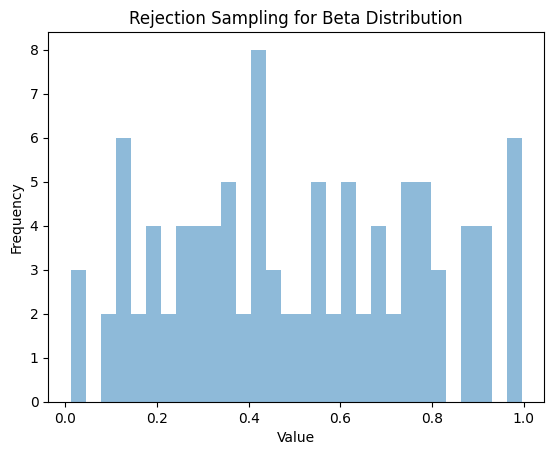

[0.4212234675673373,
 0.1875544275747506,
 0.08280913854086636,
 0.8086264528920879,
 0.4822582188963437,
 0.796694753284177,
 0.7050849104574479,
 0.6220838638958051,
 0.12239765251736034,
 0.26553404267041736]

In [ ]:
x = beta(n=100) # the higher number of samples, the most similar to a uniform.
x[0:10]

#### **M√©todo del Rechazo Generalizado.**

----

El m√©todo de Rechazo sirve para generar la distribuci√≥n Beta, distribuciones rectangulares y en
general todas aquellas con funciones de densidad definidas sobre un dominio acotado.

Sin embargo, el m√©todo no valdr√≠a para simular valores de la distribuci√≥n Normal pues en dicho
caso no es posible ‚Äúencajarla‚Äù (su soporte var√≠a entre $-\infty$ y $+\infty$, no est√° acotada).

----

La idea del m√©todo Rechazo Generalizado (von Neumann, 1951) es utilizar una envoltura $g_X$
m√°s ajustada a la funci√≥n de densidad $f_X$ con la que resultara m√°s f√°cil no rechazar. La
envolvente $g_X$ debe cumplir las siguientes propiedades:

1. Su soporte debe contener al soporte de $f_X$.
2. Debe permitir envolver a $f_X$, es decir, que $\exists a \gt 1$ tal que $f(x) \le a \times g(x),\quad \forall x \in\mathbb{R}$.
3. *Preferiblemente* deber√≠a ser invertible para poder aplicar el m√©todo de la Transformada Inversa de cara a simular valores suyos.

**Algoritmo:**

1. Sea $x\in g(\cdot)\;$ e $\;y \in (0, a\times g(x))$ $\quad y = u \cdot a \cdot g (x) $.
2. Calcular $f(x)$. Si $y \gt f(x)$, entonces ir al paso 1.
3. Definir $x_{out} = x$.

**Implementaci√≥n sobre una gaussiana:**


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def rejection_generalized_method(f, g, a = 2, n = 1000):
    """
    Generalized rejection sampling algorithm.

    Parameters:
    - f: Function representing the target probability density function.
    - g: Function representing the envelope (safety) probability density function.
    - a: Upper bound for the envelope function (default=2).
    - n: Number of samples to generate (default=1000).

    Returns:
    - samples: List of n samples generated using generalized rejection sampling.
    """

    samples = []

    while len(samples) < n:
        x = np.random.uniform()  # Generate x from the proposal distribution g
        y = np.random.uniform(0, a * g(x))  # Generate y from U(0, a * g(x))
        if y <= f(x):
            samples.append(x)

    plt.hist(samples, bins=30, density=True, alpha=0.5, label='Generated Samples')
    x_values = np.linspace(0, 3, 100)
    plt.plot(x_values, target_distribution(x_values), label='Target Distribution')
    plt.title('Generalized Rejection Sampling')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.legend()
    plt.show()

    return samples

def target_distribution(x):
    return np.exp(-x**2)
def envelope_distribution(x):
    return 1

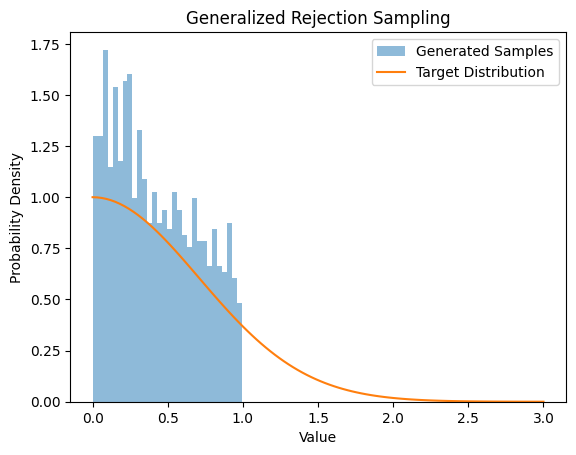

In [ ]:
a = 2
n = 1000
samples = rejection_generalized_method(target_distribution, envelope_distribution, a, n)

##### **Simulaci√≥n de una variable Normal $N(\mu,\sigma^2)$.**

$$X \sim^{d} N(\mu,\sigma^2) \Rightarrow Z = \frac{X-\mu}{\sigma} \sim^{d} N(0,1)$$

Ejercicio: Programar el m√©todo de rechazo generalizado para la Normal, utilizando como envolvente la distribuci√≥n log√≠stica: $g(x) = \frac{e^{-x}}{{(1+e^-{x})}^2}$. Generar 1000 valores y calcular su media y varianza.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normal(n=1000):
    """
    Normal distribution with parameters (mu = 0, sigma = 1).

    Parameters:
    - n: number of samples to generate.

    Returns:
    - Xs: generated samples.
    """
    Xs = np.zeros(n)

    for i in range(len(Xs)):
        u_1 = np.random.uniform(0, 1)
        u_2 = np.random.uniform(0, 1)
        x_i = -np.log(1/u_1 - 1)
        y_i = u_2 * 4/np.sqrt(2*np.pi) * np.exp(-x_i) / ((1+np.exp(-x_i))**2)

        while y_i > np.exp(-(x_i**2)/2) / np.sqrt(2*np.pi):
            u_1 = np.random.uniform(0, 1)
            u_2 = np.random.uniform(0, 1)
            x_i = -np.log(1/u_1 - 1)
            y_i = u_2 * 4/np.sqrt(2*np.pi) * np.exp(-x_i) /((1+np.exp(-x_i))**2)

        Xs[i] = x_i

    # Plot the histogram
    plt.hist(Xs, bins = 30, density=True, alpha=0.5)
    plt.title(r'Normal distribution')
    plt.xlabel(r'x')
    plt.ylabel('Probability')
    plt.show()

    return Xs

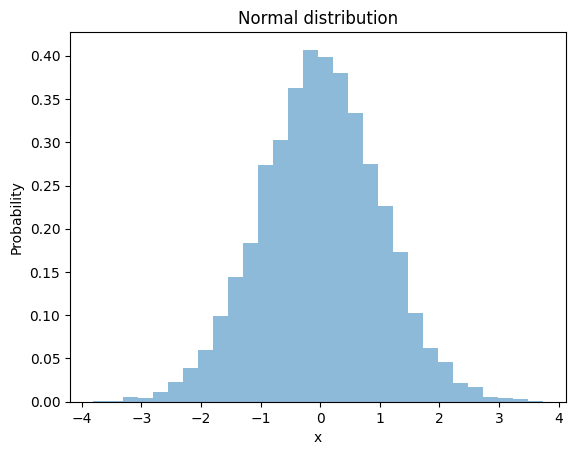

La media es 0.0031762969299523568 y la varianza es 0.9997578019480942


In [ ]:
x = normal(n=10000)
mu = np.mean(x)
sigma = np.std(x)
print(f'La media es {mu} y la varianza es {sigma**2}')

Implementaci√≥n para cualquier valor de $\mu$ y $\sigma$:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def normal_generalized(mu=0, sigma= 1, n=1000):
    """
    Normal distribution with parameters (mu = 0, sigma = 1).

    Parameters:
    - n: number of samples to generate.

    Returns:
    - Xs: generated samples.
    """
    Xs = np.zeros(n)

    for i in range(len(Xs)):
        u_1 = np.random.uniform(0, 1)
        u_2 = np.random.uniform(0, 1)
        x_i = mu + sigma * (-np.log(1/u_1 - 1))
        y_i = u_2 * np.exp(-(x_i-mu)**2 / (2*sigma**2)) / \
        (sigma * np.sqrt(2*np.pi))

        while y_i > np.exp(-(x_i**2)/2) / np.sqrt(2*np.pi):
          # dnorm(x_i, mean=0, sd=1) in R is equivalent
          # to exp(-(x_i^2)/2) / sqrt(2*pi) in Python
            u_1 = np.random.uniform(0, 1)
            u_2 = np.random.uniform(0, 1)
            x_i = mu + sigma * (-np.log(1/u_1 - 1))
            y_i = u_2 * np.exp(-(x_i-mu)**2 / (2*sigma**2)) / \
            (sigma * np.sqrt(2*np.pi))

        Xs[i] = x_i

    # Plot the histogram
    plt.hist(Xs, bins = 30, density=True, alpha=0.5)
    plt.title(fr'Normal distribution $N({mu}{sigma})$')
    plt.xlabel(r'x')
    plt.ylabel('Probability')
    plt.show()

    return Xs

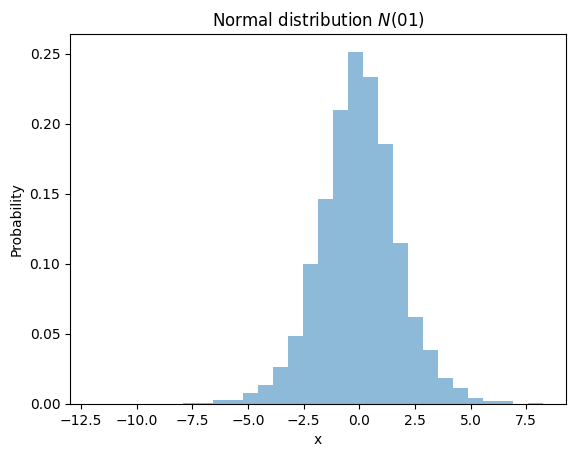

array([ 0.02996055, -0.23826357,  3.6257187 , ..., -1.69481959,
        0.21443224,  2.33708327])

In [ ]:
normal_generalized(n=10000)

#### **M√©todo de composici√≥n**

El m√©todo de composici√≥n se utiliza cuando resulta complicado simular valores de una densidad,
pero sin embargo √©sta se puede expresar como una suma ponderada de densidades para las
cuales s√≠ es f√°cil simular sus valores (por ejemplo, por el m√©todo de la transformada inversa).
Este m√©todo es v√°lido para **generar puntos de algunas distribuciones** conocidas como la
**Trapezoidal, la Triangular o la Doble Exponencial** (Laplace).

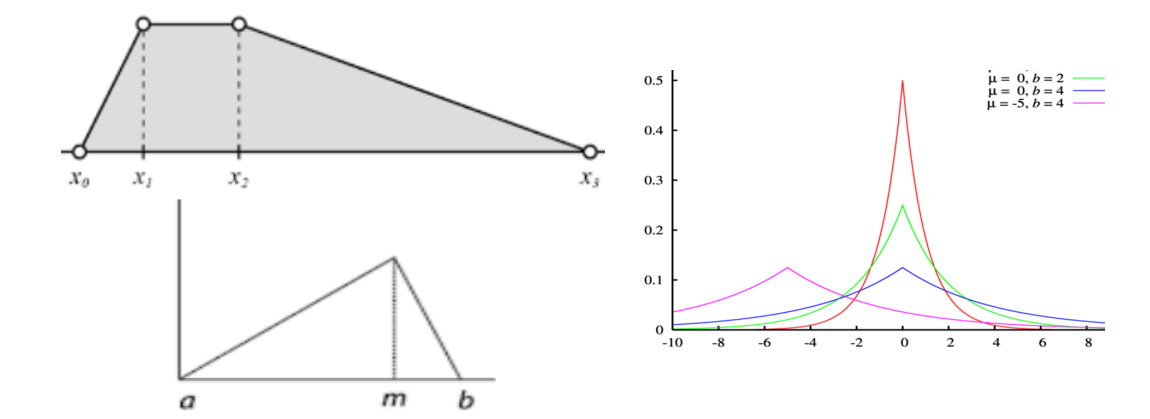


En concreto, el m√©todo permite generar valores de una variable aleatoria ùëã~ùëì(.) en aquellos casos en
los que:

$\exists \; t.q. f(x) = t \times f_1(x) + (1 - t) \times f_2(x) \quad \text{con } X_1 \sim f_1 (\ldots)$ y $X_2 \sim f_2(\cdot).
$

Basta observar que obtener valores de $f(\cdot)$ es equivalente a obtener valores de $f_1(\cdot)$ y $f_2(\cdot)$ ‚ãÖ con
probabilidades $t$ y $1-t$ respectivamente.

**Algoritmo:**
1. Generar $u \in U(0,1)$.
2. Si $u\lt t$ entonces hacer $x \in f_1(\cdot)$.
3. Definir $x_{out} = x$.

##### Simulaci√≥n de la variable doble exponencial o distribuci√≥n de Laplace $L(\lambda,\beta)$.

In [ ]:
def laplace(L=1, b=1, n=100):
    """
    Generate random samples from a Laplace distribution.

    Parameters:
    - L: Location parameter (default=1).
    - b: Scale parameter (default=1).
    - n: Number of samples to generate (default=100).

    Returns:
    - x: Array of generated samples.
    """
    u1 = np.random.uniform(0, 1, n)
    u2 = np.random.uniform(0, 1, n)
    x = np.where(u1 <= 0.5, mu - b * np.log(u2), mu + b * np.log(u2))

    plt.hist(x, bins = 30, density=True, alpha=0.5)
    plt.title(fr'Laplace distribution $L({L},{b})$')
    plt.xlabel(r'x')
    plt.ylabel('Probability')
    plt.show()
    return x

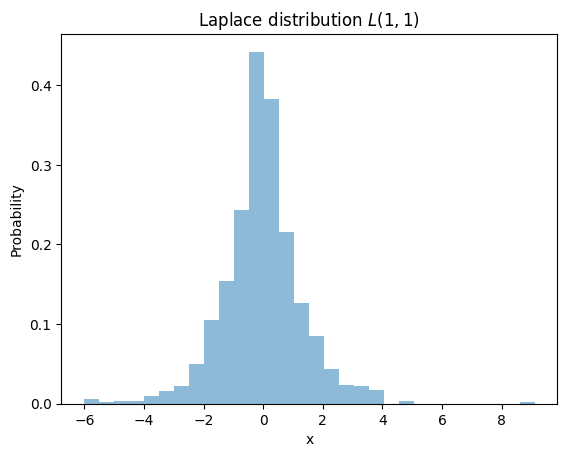

In [ ]:
x = laplace(n=1000)

##### **Otras formas de generar la distribuci√≥n normal**

1. Box Muller

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def box_muller_normal(n):
    """
    Generate n random numbers from a standard normal distribution using Box-Muller method.

    Parameters:
    - n: Number of random numbers to generate.

    Returns:
    - random_numbers: Array of generated random numbers.
    """
    u1 = np.random.rand(n)
    u2 = np.random.rand(n)

    z1 = np.sqrt(-2 * np.log(u1)) * np.cos(2 * np.pi * u2)
    z2 = np.sqrt(-2 * np.log(u1)) * np.sin(2 * np.pi * u2)

    random_numbers = np.concatenate([z1, z2])

    plt.hist(random_numbers, bins=30, density=True, alpha=0.5)
    plt.title('Generated Normal Random Numbers')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

    return random_numbers

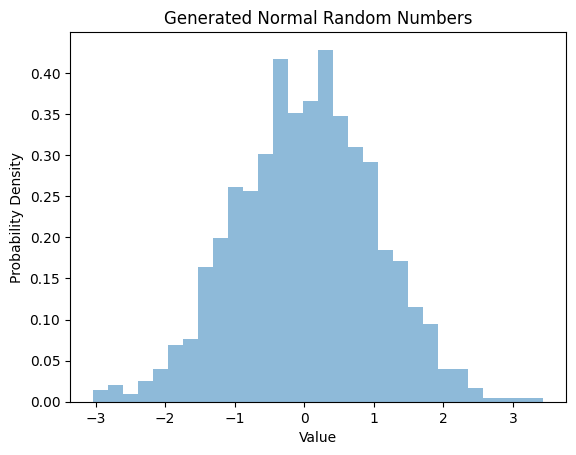

In [ ]:
n_samples = 1000
random_numbers = box_muller_normal(n_samples)

2. M√©todo de Marsaglia (Marsella):

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def marsaglia_normal(n):
    """
    Generate n random numbers from a standard normal distribution using Marsaglia's polar method.

    Parameters:
    - n: Number of random numbers to generate.

    Returns:
    - random_numbers: Array of generated random numbers.
    """
    random_numbers = np.zeros(n)
    i = 0

    while i < n:
        u = 2 * np.random.rand() - 1
        v = 2 * np.random.rand() - 1
        s = u**2 + v**2

        if 0 < s < 1:
            x = u * np.sqrt(-2 * np.log(s) / s)
            y = v * np.sqrt(-2 * np.log(s) / s)

            random_numbers[i] = x
            i += 1

            if i < n:
                random_numbers[i] = y
                i += 1

    plt.hist(random_numbers, bins=30, density=True, alpha=0.5)
    plt.title("Generated Normal Random Numbers (Marsaglia's Method)")
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

    return random_numbers

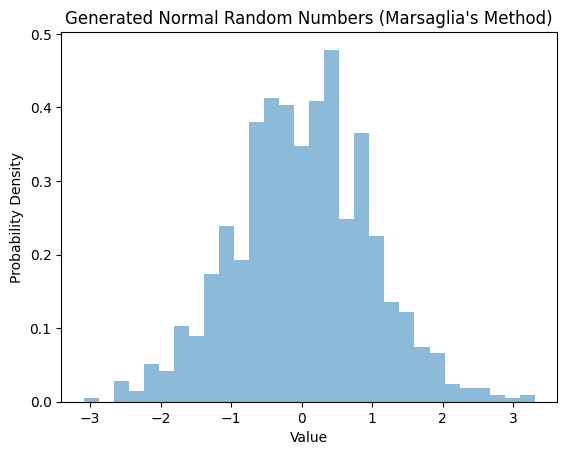

array([-0.47980473, -0.63982361,  0.61088848,  1.63723973, -0.06350304,
        0.71789318,  0.34419563, -1.70845523, -0.02822008,  0.12864446])

In [ ]:
n_samples = 1000
x = marsaglia_normal(n_samples)
x[0:10]

3. Teorema central del l√≠mite.

In [ ]:
def limit_central_theorem_normal(n):
    """
    Generate n random numbers from a standard normal distribution using the Central Limit Theorem.

    Parameters:
    - n: Number of random numbers to generate.

    Returns:
    - random_numbers: Array of generated random numbers.
    """
    random_numbers = np.zeros(n)

    for i in range(n):
        # Suma de 12 variables aleatorias uniformes [-0.5, 0.5]
        sum_uniforms = np.sum(np.random.uniform(-0.5, 0.5, 12))
        random_numbers[i] = sum_uniforms

    # Plot the histogram of generated random numbers
    plt.hist(random_numbers, bins=30, density=True, alpha=0.5)
    plt.title("Generated Normal Random Numbers (Central Limit Theorem)")
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

    return random_numbers

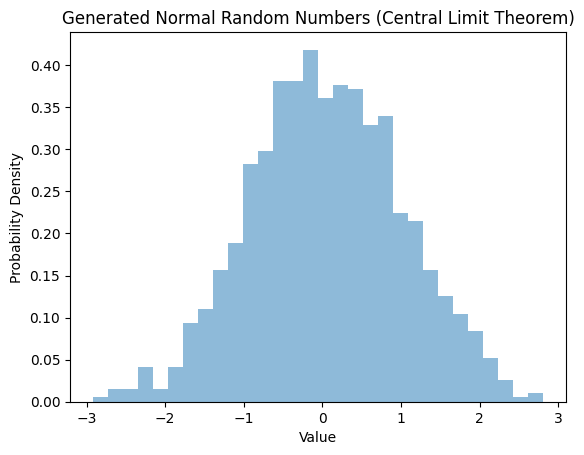

array([-0.6275541 ,  0.48952389,  2.36269176, -0.21512622, -0.44566883,
       -1.37188278, -0.33938479, -0.32825917,  0.9677809 , -0.75295013,
        0.24904401,  0.87724355, -0.11905688,  0.54773849, -0.17132711,
        0.26823925,  0.62149702,  1.40624641, -1.06467103,  1.73107173])

In [ ]:
n_samples = 1000
x = limit_central_theorem_normal(n_samples)
x[0:20]

##### **Simulaci√≥n de la variable aleatoria Lognormal $LN(\sigma,\mu)$.**

Si $\eta \sim N(\mu,\sigma^2) \Rightarrow \xi = e ^\eta \sim LN(\mu,\sigma^2) $.

L√≥gicamente:
$\log(\xi) \sim N(\mu, \sigma^2)$.

**Funci√≥n de densidad:**
$$f_\xi (x) = \frac{1}{x\sqrt{2\pi\sigma^2}}e^{-\frac{\log{(x-\mu)^2}}{2\sigma^2}}$$

**Algoritmo:**
1. Define $\eta \in N(\mu, \sigma^2)$.
2. Define $x_{out} = e^\eta$.

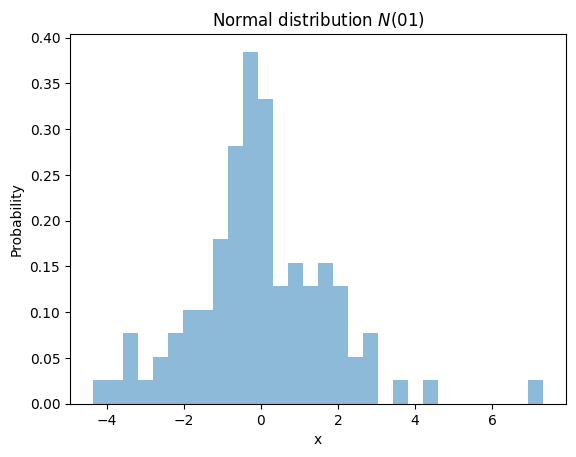

(array([98.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([1.26858660e-02, 5.09417088e+01, 1.01870732e+02, 1.52799755e+02,
        2.03728778e+02, 2.54657801e+02, 3.05586824e+02, 3.56515847e+02,
        4.07444870e+02, 4.58373893e+02, 5.09302916e+02, 5.60231939e+02,
        6.11160962e+02, 6.62089985e+02, 7.13019008e+02, 7.63948031e+02,
        8.14877054e+02, 8.65806077e+02, 9.16735100e+02, 9.67664123e+02,
        1.01859315e+03, 1.06952217e+03, 1.12045119e+03, 1.17138021e+03,
        1.22230924e+03, 1.27323826e+03, 1.32416728e+03, 1.37509631e+03,
        1.42602533e+03, 1.47695435e+03, 1.52788338e+03]),
 <BarContainer object of 30 artists>)

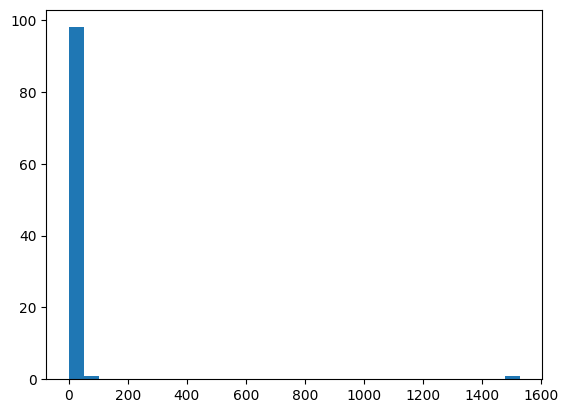

In [ ]:
# tambien valido
# normal = np.random.normal(0,1,100)
# lognormal = np.exp(normal)

x = np.exp(normal_generalized(mu=0,sigma=1,n=100))
plt.hist(x, bins=30)

##### **Simulaci√≥n de variable aleatoria Chi-cuadrado $\chi^2_n $**

**Funci√≥n de densidad:**

$$f_X(x) = \frac{\frac{1}{2}^{n/2} e^{-x/2} x^{n/2-1}}{\Gamma(n/2)}$$

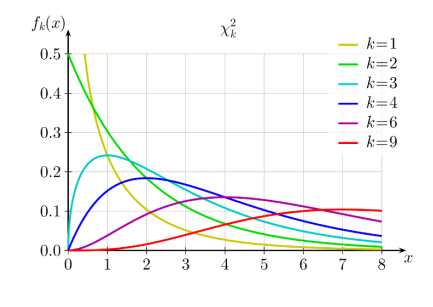

**M√©todo 1**. A partir de la suma de normales al cuadrado

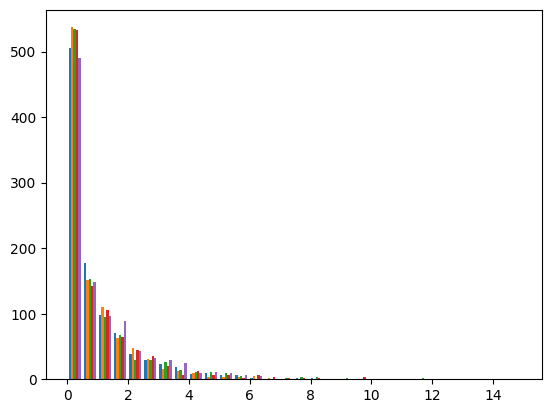

In [ ]:
m = 1000
n = 5
x = []
for i in range(n):
    x.append(np.random.normal(0,1,m)**2)

plt.hist(x, bins = 30)
plt.show()

**M√©todo 2.**

1. Generar $x_1, \ldots, x_n$ variables aleatorias independientes e id√©nticamente distribuidas $(v.a.i.i.d)$ en $\mathcal{N}(0,1)$ $\Rightarrow$ Hacer $x = \sum_{i=1}^{n} x_i^2$.


2. $\chi_{\frac{n}{2}} \sim \gamma_p = \text{Erlang}\left(\frac{n}{2}, \frac{1}{2}\right)$, donde $\lambda = \frac{1}{2}$. Si $n$ es par. Entonces $\frac{n}{2}$ es un n√∫mero entero y $\chi_{\frac{n}{2}} \sim \text{Erlang}\left(\frac{n}{2}, \frac{1}{2}\right)$.

3. Si $n$ es impar, $X = Y + X_{\frac{n}{2}}$ con $Y \sim \chi_{n-1}^{2}$ (si $n-1$ es par). Basta con generar una Erlang y una Normal.

Es decir, basta con generar $u_1, \ldots, u_{\frac{n-1}{2}} \in \mathcal{U}(0,1)$ y $z \in \mathcal{N}(0,1) \Rightarrow X = -2 \sum_{i=1}^{\frac{n-1}{2}} \log u_i + z^2$.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def chi_squared(n=20, N=1000):
    """
    Description:
    simulates a chi-squared distribution with a specified number of degrees of
    freedom and a specified number of iterations (trials).

    Parameters:
    - n (int): Degrees of freedom for the chi-squared distribution.
    Default = 20.
    - N (int): Number of repetitions, i.e., the number of random samples to
    generate. Default = 1000

    Returns:
    - chi2 (list): a list of generated samples.
    """
    chi2 = np.array([])

    for i in range(1, N + 1):
        if n % 2 == 0:
            if np.floor(n / 2) > 1:
                u = np.random.uniform(0, 1, int(n / 2))
                chi2 = np.concatenate((chi, [-2 * np.sum(np.log(u))]))
        else:
            if np.floor(n / 2) >= 1:
                u = np.random.uniform(0, 1, int((n - 1) / 2))
                z = np.random.normal(0, 1, 1)
                chi2 = np.concatenate((chi, [-2 * np.sum(np.log(u)) + z**2]))

    plt.hist(chi2, bins=30, edgecolor='black')
    plt.show()

    return chi2

##### **Simulaci√≥n de una variable aleatoria T-Student $t_n$.**

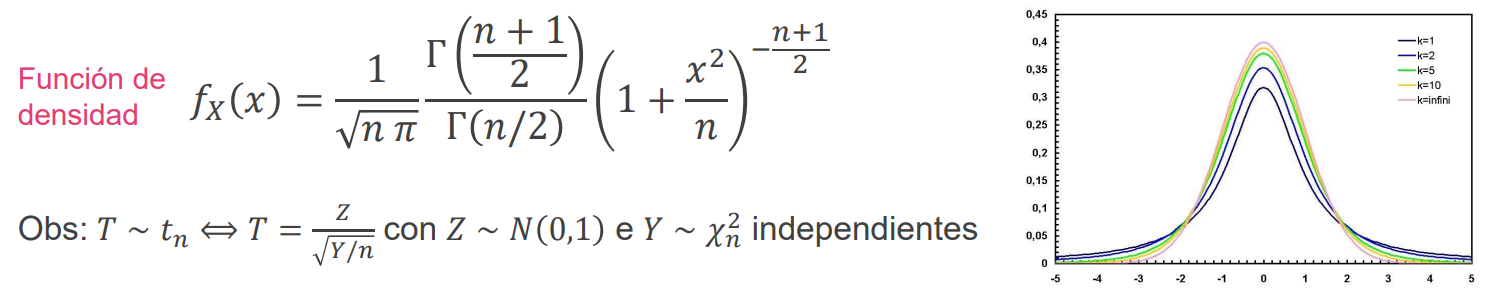

**Algoritmo:**

1. Sea $z \in N(0,1)$. Sea $y \in \chi_n^2$.

2. Sea $x = \frac{z}{y/n}$.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def t_student(n = 1000):
    """
    Description:
    - Simulate a T-Student distribution.
    Parameters:
    - n (int): number of trials.
    Returns:
    - x (list): a list with the sample size (n)
    """
    x = np.array([])
    for i in range(1000):
        z = np.random.normal(0, 1, 1)
        y = np.random.chisquare(n, 1)
        x = np.concatenate((x, z / np.sqrt(y / n)))

    plt.hist(x, bins=30, edgecolor='black')
    plt.show()

    return x

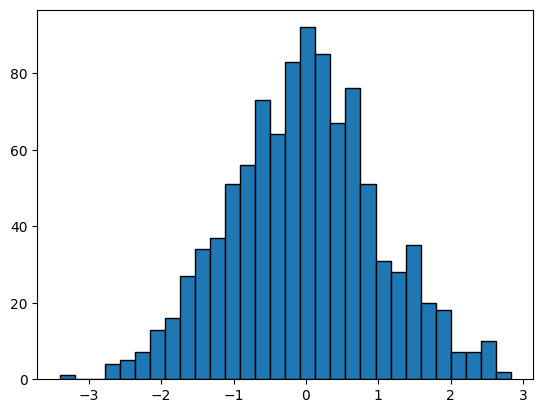

array([ 0.21412838,  0.12125947, -0.20039423, -1.31834291,  0.51387501,
        0.40848198,  0.91262296, -0.76166866,  0.55898794, -1.23427012,
        0.84886494, -1.03662736, -0.22001506, -0.98301909, -1.35077714,
       -0.99405026, -0.4431106 ,  1.69897876, -2.07591021, -1.65888436])

In [ ]:
x = t_student(n=1000)
x[0:20]

##### Simulaci√≥n de variable aleatoria F-Snedecor $F_m,n$.

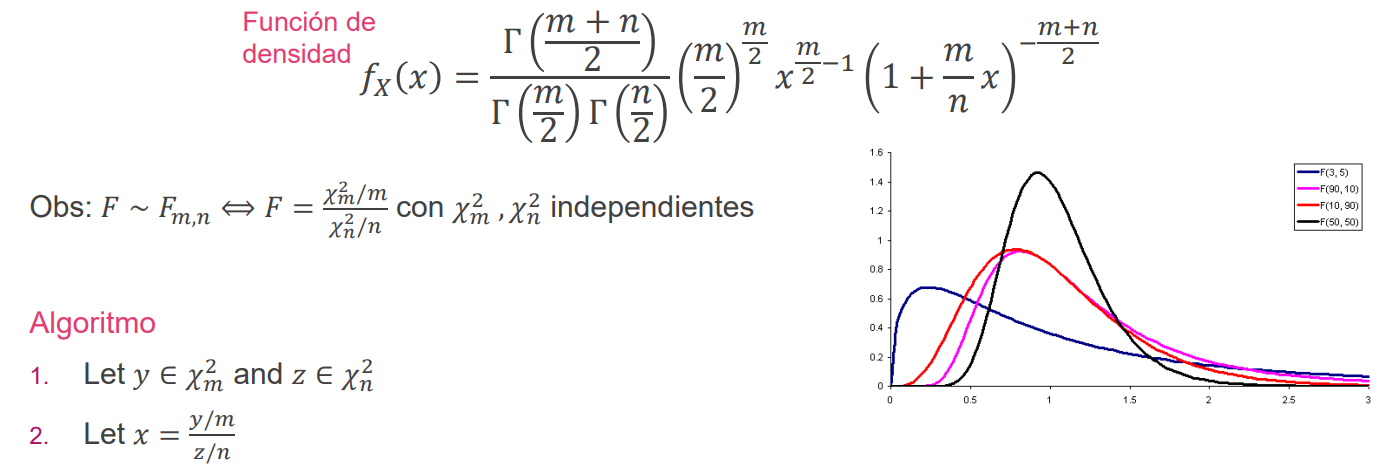

**Implementaci√≥n:**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def F_distribution(n = 10, m = 9):
    """
    Simulates samples from an F-distribution and visualizes the resulting
    histogram.

    Parameters:
    - n (int): Numerator degrees of freedom for the F-distribution. Default=10.
    - m (int): Denominator degrees of freedom for the F-distribution. Default=9.

    Returns:
    - x (numpy.ndarray): Array of simulated samples from the F-distribution.
    """
    x = np.array([])

    for i in range(1000):
        z = np.random.chisquare(n, 1)
        y = np.random.chisquare(m, 1)
        x = np.concatenate((x, (y/m) / (z/n)))

    plt.hist(x, bins=30, edgecolor='black')
    plt.title('Histogram of F-distribution')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

    return x

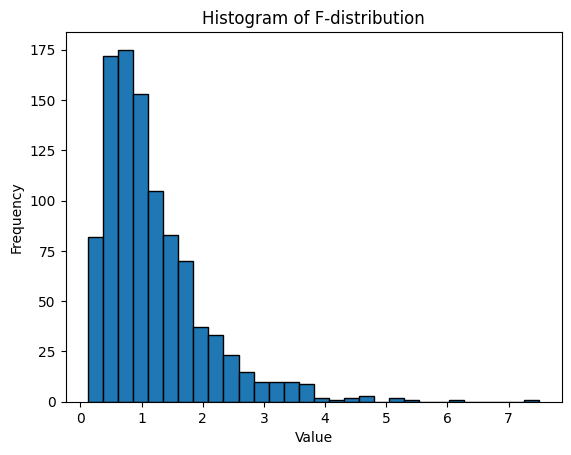

array([1.14910022, 1.78828813, 2.78902971, 2.16634581, 1.07410493,
       3.77334931, 1.2063969 , 1.33298718, 0.16806128, 1.00327496])

In [ ]:
x = F_distribution()
x[0:10]

### **Generaci√≥n de variables aleatorias mixtas**

**VV.AA. mixtas**: no son ni continuas ni discretas
(Su funci√≥n de distribuci√≥n tiene segmentos de crecimiento continuo, pero tambi√©n discontinuidades).

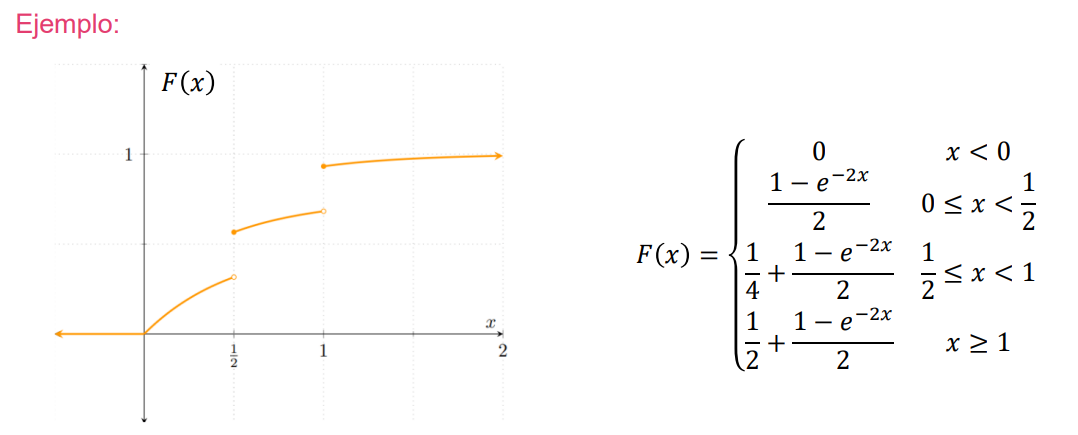

Se forma concatenando la F.D. de la variable aleatoria continua y la discreta, de la forma siguiente:

$$F(‚ãÖ) = \lambda F_c(\cdot) + (1-\lambda) F_D(\cdot).$$

Siendo $F_D$ la funci√≥n discreta y siendo $F_c$ la absolutamente continua.

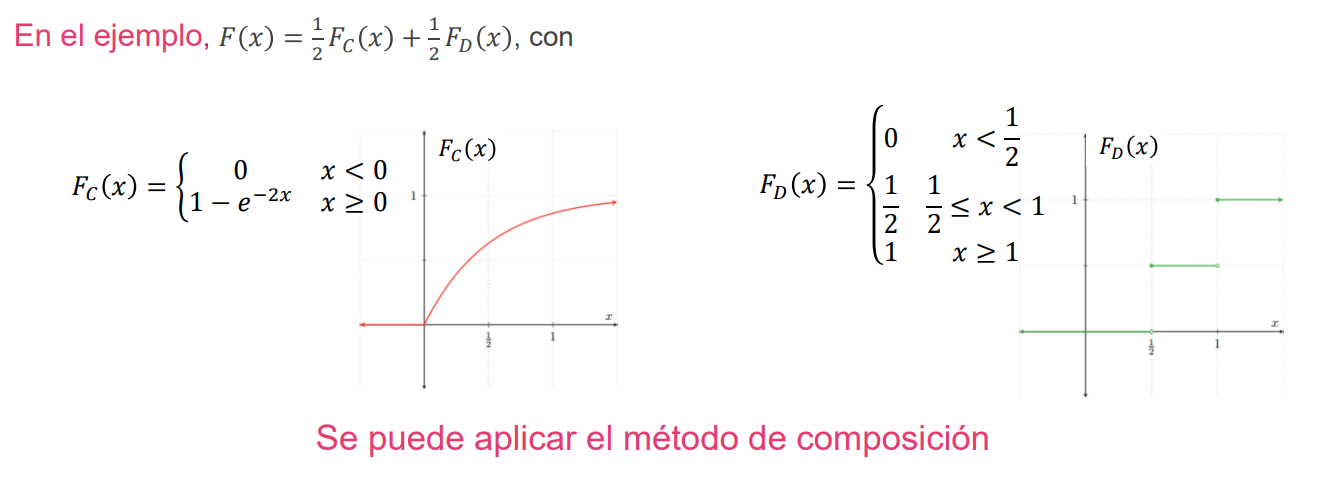

### **Generaci√≥n de variables aleatorias multidimensionales.**



#### **Generaci√≥n de una variable aleatoria del tipo Multinomial $MN(n,p_1,p_2,\dots, p_{k-1})$.**

**Funci√≥n de masa:**
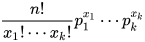

La distribuci√≥n multinomial plantea la divisi√≥n de una poblaci√≥n en $k$ clases $A_i$ asociadas a las
cuales hay una proporci√≥n $p_i$ = $P(A_i)$, con $\sum_{i=1}^kp_i=1$.

De dicha poblaci√≥n se extraen n elementos con reemplazamiento. Si $X_i$ es el n√∫mero de elementos extra√≠dos de la clase $i \Rightarrow X  =(X_1, X_2, \dots, X_{k-1}) \sim MN(n,p_1,p_2, \dots, p_{k-1})$.

**Implementaci√≥n:**

In [ ]:
import seaborn as sns
import numpy as np

def multinomial(k = 4, N = 1000, n = 25):
    """
    Generates samples from a multinomial distribution and stores them in a
    matrix.

    Parameters:
    - k (int): Number of categories in the multinomial distribution. Default=4.
    - N (int): Number of samples to generate. Default=1000.
    - n (int): Total number of trials in each sample. Default=25.

    Returns:
    - X (numpy.ndarray): Matrix of generated samples with dimensions (N, k).
    """

    # Initialize matrix X
    X = np.zeros((N, k), dtype=int)

    # Define probabilities for each category
    p = np.array([1, 1/2, 1/3, 1/4])
    p = p / np.sum(p)

    # Generate samples
    for idx in range(N):
        X[idx, 0] = np.random.binomial(n, p[0])
        for i in range(1, len(p)-1):
            remaining_trials = n - np.sum(X[idx, 0:i])
            adjusted_prob = p[i] / (1 - np.sum(p[0:i]))
            X[idx, i] = np.random.binomial(remaining_trials, adjusted_prob)
        X[idx, -1] = n - np.sum(X[idx, 0:(len(p)-1)])

    sns.histplot(X, bins=30, label=f'Multinomial', kde=True).\
                 set(title=rf'Multinomial distribution $MN({n},{k})$')

    return X

array([[13,  4,  6,  2],
       [11,  7,  5,  2],
       [12,  2,  8,  3],
       [14,  5,  2,  4],
       [16,  8,  0,  1],
       [16,  6,  2,  1],
       [16,  4,  1,  4],
       [12,  2,  5,  6],
       [13,  9,  1,  2],
       [13,  8,  3,  1]])

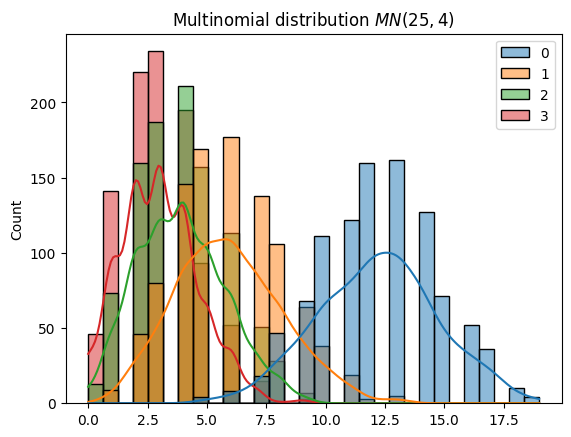

In [ ]:
x = multinomial()
x[0:10]

#### **Simulaci√≥n de una variable aleatoria del tipo Normal multivariante $N(ùûµ, \Sigma)$

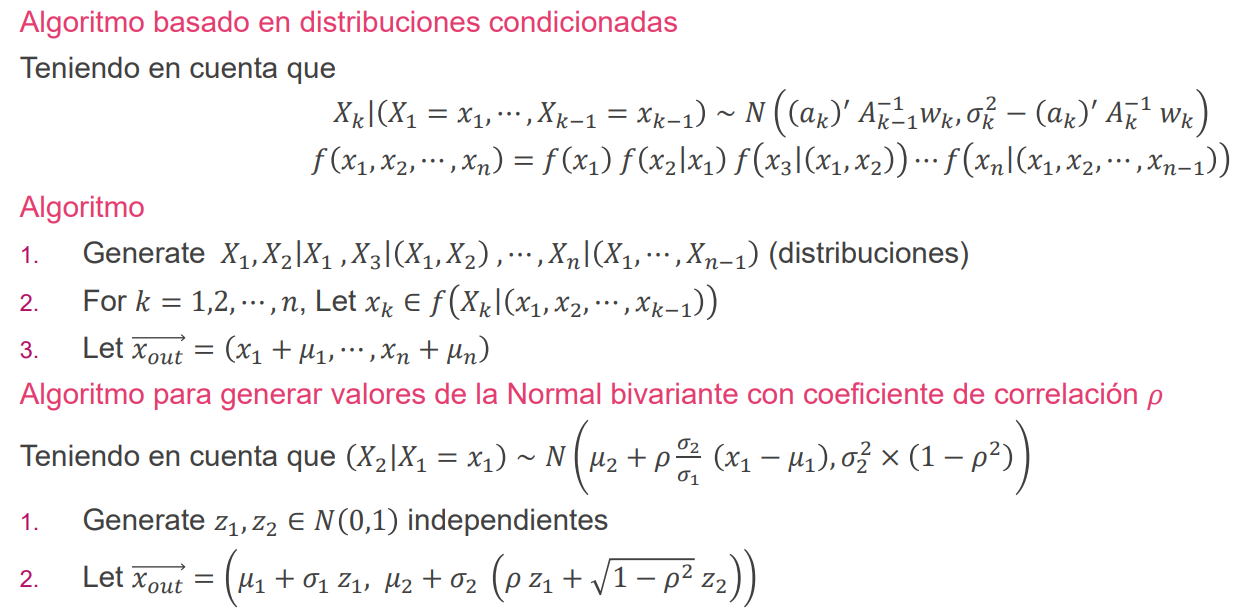



In [ ]:
import numpy as np

def multivariate_normal(mu = [0,0], sigma = [[2,1],[1,1]], n = 2, m = 10):
    """
    Generates samples from a multivariate normal distribution.

    Parameters:
    - mu (numpy.ndarray): Mean vector of the multivariate normal distribution.
    Default = 0
    - sigma (numpy.ndarray): Covariance matrix of the multivariate normal
    distribution. Default = 0.5
    - n (int): Number of dimensions in the multivariate normal distribution.
    Default = 10.
    - size (int): Number of samples to generate. Default = 1000.

    Returns:
    - samples (list): List of generated samples.
    """

    # Cholesky decomposition of the covariance matrix
    L = np.linalg.cholesky(sigma)

    # Initialize list
    samples = []

    # Generate samples
    for i in range(m):
        z = np.random.normal(0, 1, n)
        x = mu + np.dot(L, z)
        samples.append(x.tolist())

    sns.histplot(samples, bins=30, kde=True).\
                 set(title=rf'Multivariate Normal distribution $N({mu},{sigma})$')

    return samples

[[2.116397361462901, 1.8758022249095205],
 [1.3633047985508675, 0.45988115845215916],
 [-1.2353252377892239, -1.7603195227700648],
 [-0.8416678260987567, 0.47012577029635544],
 [-0.9642894410825715, -1.0326823111651027],
 [-1.0216702547194807, -0.4291970792216923],
 [-0.9232621999017062, -0.3054364772202674],
 [0.6714622884363606, 0.9361210380247252],
 [0.47134846926734286, -0.3218872869099852],
 [1.4339490759030264, 1.0730871183433452]]

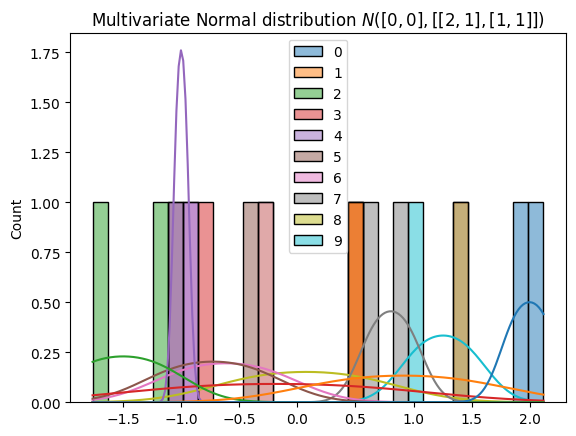

In [ ]:
x = multivariate_normal()
x[0:10]

#### **Simulaci√≥n de una variable aleatoria del tipo t-Student multivariante $T_n$.**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def t_student_multivariante(m=100, n=3, sigma=1, plot=True):
  def generate_x(m, sigma):
    return np.random.normal(0, sigma, m)

  def generate_y(n):
    return np.random.chisquare(n-1)

  def calculate_t(x, y, n):
    return x / y / n

  def plot_distribution(values):
    plt.hist(values, bins=20, density=True, alpha=0.7, color='g')
    plt.title('t-Student Multivariante')
    plt.xlabel('Value')
    plt.ylabel('Probability Density')
    plt.show()

  x_values = generate_x(m, sigma)
  y_value = generate_y(n)

  t_values = [calculate_t(x, y_value, n) for x in x_values]

  x_output = tuple(t_values)

  if plot == True:
    plot_distribution(x_output)

  return x_output

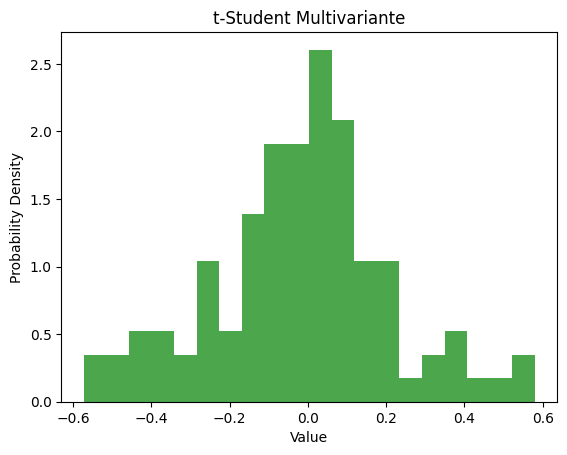

(-0.11949012921791118,
 -0.16371125379915247,
 0.06934812201130952,
 -0.48185841895834997,
 -0.06332389262932639,
 -0.5522248783614183,
 -0.030436377196753267,
 -0.10302668605640077,
 0.5543847024638927,
 0.00923253394962894)

In [ ]:
resultados= t_student_multivariante(plot=True)
resultados[0:10]